# Hand-make Linear Regression

In [25]:
# approximate function
def predict_sales(X, w, b):
    return w*X + b

In [26]:
# we use MSE (L2) function as a cost function
def cost_function(X, y, w, b):
    samples = X.shape[0]
    total_error = 0.0
    for i in range(samples):
        total_error += (y[i] - (w*X[i] + b))**2
    return total_error / samples

In [27]:
def update_weights(X, y, w, b, learning_rate):
    w_d = 0
    b_d = 0
    samples = X.shape[0]

    for i in range(samples):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        w_d += -2*X[i] * (y[i] - (w*X[i] + b))

        # -2(y - (mx + b))
        b_d += -2*(y[i] - (w*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    w -= (w_d / samples) * learning_rate
    b -= (b_d / samples) * learning_rate

    return w, b

In [28]:
def train(X, y, learning_rate, iters):
    cost_history = []
    w = 0
    b = 0

    for i in range(iters):
        w, b = update_weights(X, y, w, b, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(X, y, w, b)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={}    weight={}    bias={}    cost={}".format(i, w, b, cost))

    return w, b, cost_history

## Example

In [29]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [30]:
%matplotlib notebook

In [31]:
X, y = make_regression(n_samples=160, n_features=1, random_state=0, noise=1)
print(X.shape)
print(y.shape)
# print(X[:10])

(160, 1)
(160,)


<IPython.core.display.Javascript object>


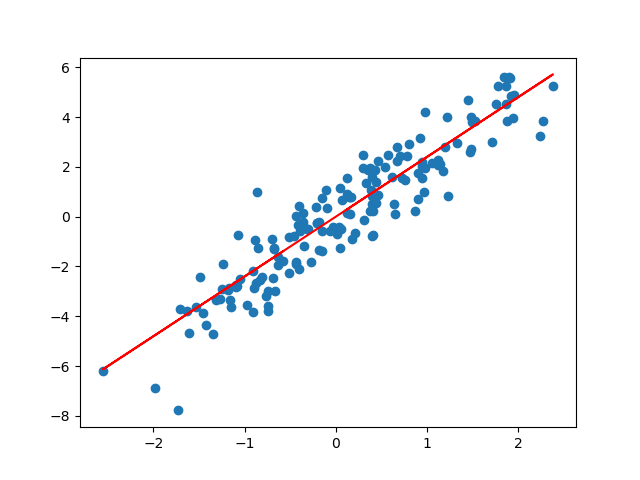

In [32]:
fig1, ax1 = plt.subplots();
ax1.scatter(X, y);
# the best coef from next cell
weight = 2.4
bias = 0
ax1.plot(X, X*weight + bias, 'r')

In [9]:
weight = np.arange(0, 4, 0.2)
bias = range (-3, 3)
for elem_w in weight:
    for elem_b in bias:
        # ax1.plot(X, X*elem_w + elem_b)
        print("Cost function = {:.2f} value for weight {:.1f} and bias {}".format(
            float(cost_function(X, y, elem_w, elem_b)), elem_w, elem_b))

Cost function = 17.07 value for weight 0.0 and bias -3
Cost function = 11.79 value for weight 0.0 and bias -2
Cost function = 8.52 value for weight 0.0 and bias -1
Cost function = 7.24 value for weight 0.0 and bias 0
Cost function = 7.97 value for weight 0.0 and bias 1
Cost function = 10.69 value for weight 0.0 and bias 2
Cost function = 15.96 value for weight 0.2 and bias -3
Cost function = 10.73 value for weight 0.2 and bias -2
Cost function = 7.49 value for weight 0.2 and bias -1
Cost function = 6.26 value for weight 0.2 and bias 0
Cost function = 7.03 value for weight 0.2 and bias 1
Cost function = 9.79 value for weight 0.2 and bias 2
Cost function = 14.93 value for weight 0.4 and bias -3
Cost function = 9.74 value for weight 0.4 and bias -2
Cost function = 6.55 value for weight 0.4 and bias -1
Cost function = 5.36 value for weight 0.4 and bias 0
Cost function = 6.17 value for weight 0.4 and bias 1
Cost function = 8.98 value for weight 0.4 and bias 2
Cost function = 13.99 value for

In [33]:
# split dataset into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# output setting for numpy 
np.set_printoptions(precision=3)

# init parameters
weight = 0
bias = 0
learning_rate = 0.1
num_iterates = 60

# gradient descent
for i in range(num_iterates):
    weight, bias = update_weights(X_train, y_train, weight, bias, learning_rate)
    print("Weight: {}, Bias: {}, Iteration: {}".format(weight, bias, i))

Weight: [0.545], Bias: [0.012], Iteration: 0
Weight: [0.968], Bias: [0.011], Iteration: 1
Weight: [1.297], Bias: [0.002], Iteration: 2
Weight: [1.554], Bias: [-0.013], Iteration: 3
Weight: [1.753], Bias: [-0.03], Iteration: 4
Weight: [1.909], Bias: [-0.047], Iteration: 5
Weight: [2.03], Bias: [-0.065], Iteration: 6
Weight: [2.124], Bias: [-0.081], Iteration: 7
Weight: [2.198], Bias: [-0.096], Iteration: 8
Weight: [2.256], Bias: [-0.109], Iteration: 9
Weight: [2.301], Bias: [-0.121], Iteration: 10
Weight: [2.337], Bias: [-0.132], Iteration: 11
Weight: [2.364], Bias: [-0.141], Iteration: 12
Weight: [2.386], Bias: [-0.149], Iteration: 13
Weight: [2.403], Bias: [-0.156], Iteration: 14
Weight: [2.416], Bias: [-0.161], Iteration: 15
Weight: [2.427], Bias: [-0.166], Iteration: 16
Weight: [2.435], Bias: [-0.17], Iteration: 17
Weight: [2.442], Bias: [-0.174], Iteration: 18
Weight: [2.447], Bias: [-0.177], Iteration: 19
Weight: [2.451], Bias: [-0.179], Iteration: 20
Weight: [2.454], Bias: [-0.18

In [34]:
print(X)
print(y)
print(y.shape)
print(X.shape)
print(train(X, y, 0.1, 60))

[[ 0.127]
 [ 0.676]
 [-1.049]
 [ 1.494]
 [ 0.444]
 [-0.438]
 [-0.387]
 [ 0.378]
 [ 1.222]
 [ 0.969]
 [ 0.402]
 [-1.536]
 [ 0.672]
 [ 1.951]
 [ 1.896]
 [ 0.122]
 [-1.42 ]
 [-1.147]
 [ 1.454]
 [ 1.23 ]
 [-0.826]
 [-0.672]
 [ 0.067]
 [ 0.707]
 [-0.155]
 [-0.028]
 [-0.977]
 [ 0.463]
 [-0.742]
 [ 0.4  ]
 [ 0.864]
 [ 0.334]
 [ 0.729]
 [-0.685]
 [-1.348]
 [ 1.944]
 [-0.36 ]
 [ 1.923]
 [-1.093]
 [ 0.614]
 [ 1.127]
 [-0.187]
 [ 0.95 ]
 [-1.071]
 [-0.663]
 [ 1.764]
 [ 0.439]
 [-0.854]
 [-0.51 ]
 [ 1.179]
 [-0.208]
 [-0.435]
 [-0.363]
 [ 0.376]
 [ 0.167]
 [-1.726]
 [-0.414]
 [ 0.635]
 [-0.103]
 [ 0.056]
 [ 0.155]
 [ 0.208]
 [ 1.883]
 [-0.636]
 [-0.895]
 [-1.099]
 [-0.268]
 [ 1.481]
 [-0.302]
 [-0.77 ]
 [ 0.906]
 [ 0.144]
 [-0.907]
 [ 0.979]
 [ 0.411]
 [-1.63 ]
 [ 0.977]
 [-1.173]
 [ 0.046]
 [ 1.533]
 [-1.706]
 [-1.165]
 [-2.553]
 [-0.402]
 [ 1.488]
 [ 0.944]
 [ 0.298]
 [ 0.802]
 [-0.913]
 [ 0.129]
 [-0.068]
 [ 0.387]
 [ 1.117]
 [ 0.011]
 [ 1.202]
 [-1.27 ]
 [-1.614]
 [ 2.241]
 [ 1.713]
 [ 1.868]


# Use Regression on Real Data (Boston)

In [35]:
from sklearn.datasets import load_boston

X_train.shape=  (379, 1)
y_train.shape=  (379,)
iter=0    weight=[5.743]    bias=[0.888]    cost=[268.53]
iter=10    weight=[3.57]    bias=[0.375]    cost=[62.217]
iter=20    weight=[3.574]    bias=[0.206]    cost=[62.056]
iter=30    weight=[3.6]    bias=[0.041]    cost=[61.917]
iter=40    weight=[3.626]    bias=[-0.123]    cost=[61.779]
iter=50    weight=[3.651]    bias=[-0.286]    cost=[61.643]
iter=60    weight=[3.677]    bias=[-0.449]    cost=[61.507]
iter=70    weight=[3.703]    bias=[-0.61]    cost=[61.374]
iter=80    weight=[3.728]    bias=[-0.771]    cost=[61.241]
iter=90    weight=[3.753]    bias=[-0.931]    cost=[61.11]
iter=100    weight=[3.778]    bias=[-1.091]    cost=[60.979]
iter=110    weight=[3.803]    bias=[-1.249]    cost=[60.85]
iter=120    weight=[3.828]    bias=[-1.407]    cost=[60.723]
iter=130    weight=[3.853]    bias=[-1.564]    cost=[60.596]
iter=140    weight=[3.878]    bias=[-1.721]    cost=[60.471]
iter=150    weight=[3.902]    bias=[-1.876]    cost=[60.34

iter=1350    weight=[6.137]    bias=[-16.059]    cost=[51.526]
iter=1360    weight=[6.151]    bias=[-16.146]    cost=[51.487]
iter=1370    weight=[6.165]    bias=[-16.233]    cost=[51.448]
iter=1380    weight=[6.178]    bias=[-16.32]    cost=[51.41]
iter=1390    weight=[6.192]    bias=[-16.406]    cost=[51.372]
iter=1400    weight=[6.206]    bias=[-16.492]    cost=[51.334]
iter=1410    weight=[6.219]    bias=[-16.577]    cost=[51.297]
iter=1420    weight=[6.232]    bias=[-16.662]    cost=[51.26]
iter=1430    weight=[6.246]    bias=[-16.746]    cost=[51.224]
iter=1440    weight=[6.259]    bias=[-16.83]    cost=[51.187]
iter=1450    weight=[6.272]    bias=[-16.914]    cost=[51.151]
iter=1460    weight=[6.285]    bias=[-16.997]    cost=[51.116]
iter=1470    weight=[6.298]    bias=[-17.08]    cost=[51.081]
iter=1480    weight=[6.311]    bias=[-17.163]    cost=[51.046]
iter=1490    weight=[6.324]    bias=[-17.245]    cost=[51.011]
iter=1500    weight=[6.337]    bias=[-17.326]    cost=[50.97

iter=2660    weight=[7.481]    bias=[-24.586]    cost=[48.59]
iter=2670    weight=[7.489]    bias=[-24.633]    cost=[48.579]
iter=2680    weight=[7.496]    bias=[-24.679]    cost=[48.568]
iter=2690    weight=[7.503]    bias=[-24.726]    cost=[48.557]
iter=2700    weight=[7.51]    bias=[-24.772]    cost=[48.546]
iter=2710    weight=[7.518]    bias=[-24.818]    cost=[48.536]
iter=2720    weight=[7.525]    bias=[-24.863]    cost=[48.525]
iter=2730    weight=[7.532]    bias=[-24.909]    cost=[48.514]
iter=2740    weight=[7.539]    bias=[-24.954]    cost=[48.504]
iter=2750    weight=[7.546]    bias=[-24.999]    cost=[48.493]
iter=2760    weight=[7.553]    bias=[-25.044]    cost=[48.483]
iter=2770    weight=[7.56]    bias=[-25.088]    cost=[48.473]
iter=2780    weight=[7.567]    bias=[-25.133]    cost=[48.463]
iter=2790    weight=[7.574]    bias=[-25.177]    cost=[48.453]
iter=2800    weight=[7.581]    bias=[-25.221]    cost=[48.443]
iter=2810    weight=[7.588]    bias=[-25.264]    cost=[48.

iter=3990    weight=[8.208]    bias=[-29.199]    cost=[47.744]
iter=4000    weight=[8.212]    bias=[-29.224]    cost=[47.74]
iter=4010    weight=[8.216]    bias=[-29.248]    cost=[47.737]
iter=4020    weight=[8.22]    bias=[-29.273]    cost=[47.734]
iter=4030    weight=[8.224]    bias=[-29.297]    cost=[47.731]
iter=4040    weight=[8.227]    bias=[-29.321]    cost=[47.728]
iter=4050    weight=[8.231]    bias=[-29.346]    cost=[47.725]
iter=4060    weight=[8.235]    bias=[-29.37]    cost=[47.722]
iter=4070    weight=[8.239]    bias=[-29.394]    cost=[47.719]
iter=4080    weight=[8.243]    bias=[-29.417]    cost=[47.716]
iter=4090    weight=[8.246]    bias=[-29.441]    cost=[47.713]
iter=4100    weight=[8.25]    bias=[-29.465]    cost=[47.711]
iter=4110    weight=[8.254]    bias=[-29.488]    cost=[47.708]
iter=4120    weight=[8.257]    bias=[-29.512]    cost=[47.705]
iter=4130    weight=[8.261]    bias=[-29.535]    cost=[47.702]
iter=4140    weight=[8.265]    bias=[-29.558]    cost=[47.6

iter=5300    weight=[8.589]    bias=[-31.617]    cost=[47.508]
iter=5310    weight=[8.591]    bias=[-31.63]    cost=[47.507]
iter=5320    weight=[8.593]    bias=[-31.643]    cost=[47.506]
iter=5330    weight=[8.596]    bias=[-31.656]    cost=[47.505]
iter=5340    weight=[8.598]    bias=[-31.67]    cost=[47.504]
iter=5350    weight=[8.6]    bias=[-31.683]    cost=[47.503]
iter=5360    weight=[8.602]    bias=[-31.695]    cost=[47.502]
iter=5370    weight=[8.604]    bias=[-31.708]    cost=[47.501]
iter=5380    weight=[8.606]    bias=[-31.721]    cost=[47.501]
iter=5390    weight=[8.608]    bias=[-31.734]    cost=[47.5]
iter=5400    weight=[8.61]    bias=[-31.747]    cost=[47.499]
iter=5410    weight=[8.612]    bias=[-31.759]    cost=[47.498]
iter=5420    weight=[8.614]    bias=[-31.772]    cost=[47.497]
iter=5430    weight=[8.616]    bias=[-31.784]    cost=[47.496]
iter=5440    weight=[8.618]    bias=[-31.797]    cost=[47.496]
iter=5450    weight=[8.62]    bias=[-31.809]    cost=[47.495]


iter=6610    weight=[8.793]    bias=[-32.911]    cost=[47.44]
iter=6620    weight=[8.794]    bias=[-32.918]    cost=[47.44]
iter=6630    weight=[8.795]    bias=[-32.925]    cost=[47.439]
iter=6640    weight=[8.797]    bias=[-32.932]    cost=[47.439]
iter=6650    weight=[8.798]    bias=[-32.939]    cost=[47.439]
iter=6660    weight=[8.799]    bias=[-32.946]    cost=[47.439]
iter=6670    weight=[8.8]    bias=[-32.953]    cost=[47.438]
iter=6680    weight=[8.801]    bias=[-32.96]    cost=[47.438]
iter=6690    weight=[8.802]    bias=[-32.967]    cost=[47.438]
iter=6700    weight=[8.803]    bias=[-32.973]    cost=[47.438]
iter=6710    weight=[8.804]    bias=[-32.98]    cost=[47.437]
iter=6720    weight=[8.805]    bias=[-32.987]    cost=[47.437]
iter=6730    weight=[8.806]    bias=[-32.994]    cost=[47.437]
iter=6740    weight=[8.807]    bias=[-33.]    cost=[47.437]
iter=6750    weight=[8.808]    bias=[-33.007]    cost=[47.437]
iter=6760    weight=[8.809]    bias=[-33.014]    cost=[47.436]
i

iter=7940    weight=[8.904]    bias=[-33.611]    cost=[47.42]
iter=7950    weight=[8.904]    bias=[-33.614]    cost=[47.42]
iter=7960    weight=[8.905]    bias=[-33.618]    cost=[47.42]
iter=7970    weight=[8.905]    bias=[-33.622]    cost=[47.42]
iter=7980    weight=[8.906]    bias=[-33.626]    cost=[47.42]
iter=7990    weight=[8.906]    bias=[-33.629]    cost=[47.42]
iter=8000    weight=[8.907]    bias=[-33.633]    cost=[47.42]
iter=8010    weight=[8.908]    bias=[-33.637]    cost=[47.42]
iter=8020    weight=[8.908]    bias=[-33.64]    cost=[47.42]
iter=8030    weight=[8.909]    bias=[-33.644]    cost=[47.42]
iter=8040    weight=[8.909]    bias=[-33.648]    cost=[47.42]
iter=8050    weight=[8.91]    bias=[-33.651]    cost=[47.42]
iter=8060    weight=[8.91]    bias=[-33.655]    cost=[47.42]
iter=8070    weight=[8.911]    bias=[-33.658]    cost=[47.42]
iter=8080    weight=[8.912]    bias=[-33.662]    cost=[47.419]
iter=8090    weight=[8.912]    bias=[-33.665]    cost=[47.419]
iter=8100

iter=9270    weight=[8.962]    bias=[-33.982]    cost=[47.415]
iter=9280    weight=[8.962]    bias=[-33.984]    cost=[47.415]
iter=9290    weight=[8.963]    bias=[-33.986]    cost=[47.415]
iter=9300    weight=[8.963]    bias=[-33.988]    cost=[47.415]
iter=9310    weight=[8.963]    bias=[-33.99]    cost=[47.415]
iter=9320    weight=[8.964]    bias=[-33.992]    cost=[47.415]
iter=9330    weight=[8.964]    bias=[-33.993]    cost=[47.415]
iter=9340    weight=[8.964]    bias=[-33.995]    cost=[47.415]
iter=9350    weight=[8.964]    bias=[-33.997]    cost=[47.415]
iter=9360    weight=[8.965]    bias=[-33.999]    cost=[47.415]
iter=9370    weight=[8.965]    bias=[-34.001]    cost=[47.415]
iter=9380    weight=[8.965]    bias=[-34.003]    cost=[47.415]
iter=9390    weight=[8.966]    bias=[-34.005]    cost=[47.415]
iter=9400    weight=[8.966]    bias=[-34.007]    cost=[47.415]
iter=9410    weight=[8.966]    bias=[-34.009]    cost=[47.415]
iter=9420    weight=[8.967]    bias=[-34.011]    cost=[4

<IPython.core.display.Javascript object>


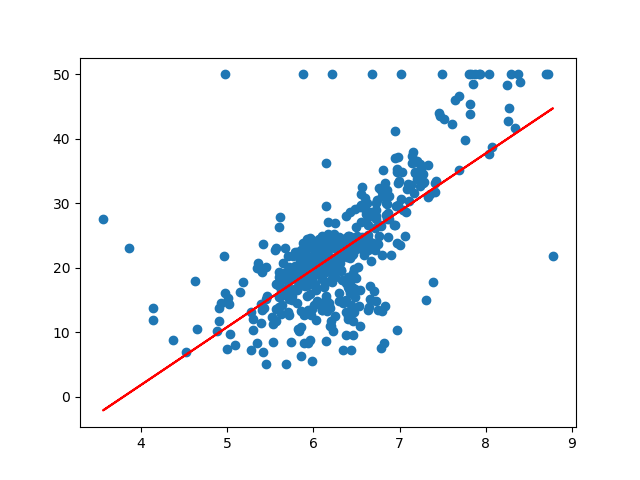

In [36]:
X, y = load_boston(return_X_y = True)
X= X[:,5] # 5 corresponds to 'RM' 
X= X.reshape(-1,1) # make it 2d as for case of mutivariable
X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state = 2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
# plt.figure()
# plt.scatter(X, y);
weight, bias, cost_history = train(X_train, y_train, 0.02, 10000)

fig2, ax2 = plt.subplots();
ax2.scatter(X, y);
ax2.plot(X, X*weight + bias, 'r');

<IPython.core.display.Javascript object>


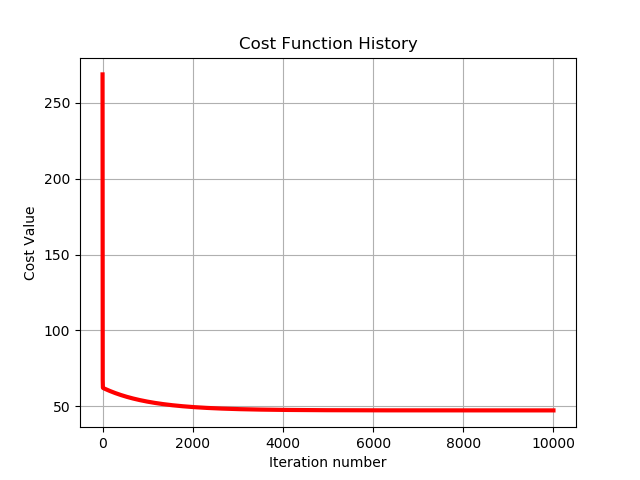

In [37]:
plt.figure()
plt.plot(cost_history, '-r', linewidth=3)
plt.title("Cost Function History")
plt.xlabel("Iteration number")
plt.ylabel("Cost Value")
plt.grid(True)